In [192]:
import pandas as pd
import numpy as np

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [194]:
data = pd.read_csv('task_d.csv')
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [195]:
data.shape

(100, 8)

In [196]:
data.columns

Index(['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w', 'target'], dtype='object')

In [197]:
d_train = data.drop(labels = ['target'], axis = 1).values
d_train[:3]

array([[-0.5810659 ,  0.84183714, -1.01297765, -0.60402468,  0.84183714,
        -0.66592679, -0.53627703],
       [-0.89430898, -0.2078351 , -1.01297765, -0.88305213, -0.2078351 ,
        -0.91705408, -0.52236404],
       [-1.20755205,  0.21203379, -1.08231219, -1.15091848,  0.21203379,
        -1.16650718,  0.20573767]])

In [198]:
y_train = data.target.values
y_train[:3]

array([0, 0, 0], dtype=int64)

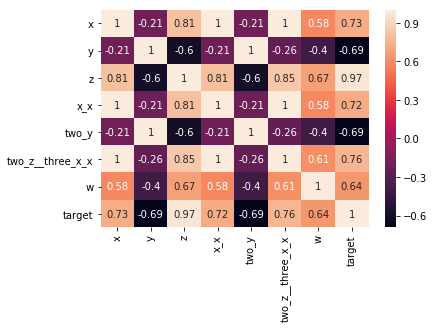

In [199]:
import seaborn as sns

data_corr = data_i.corr()
# plot the heatmap and annotation on it
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns, annot=True)

In [200]:
model = LogisticRegression()

In [201]:
alphas = np.logspace(-10, 1, 400)
print(type(alphas))
print(alphas.shape)
alphas[:5]

<class 'numpy.ndarray'>
(400,)


array([1.00000000e-10, 1.06553795e-10, 1.13537112e-10, 1.20978102e-10,
       1.28906759e-10])

In [202]:
penalties = ['l1', 'l2', 'elasticnet']
penalties

['l1', 'l2', 'elasticnet']

In [203]:
tolerances = [1e-3, 1e-4, 1e-5]

In [204]:
class_weights = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}, {1:0.3, 0:0.7}]
class_weights

[{1: 0.5, 0: 0.5},
 {1: 0.4, 0: 0.6},
 {1: 0.6, 0: 0.4},
 {1: 0.7, 0: 0.3},
 {1: 0.3, 0: 0.7}]

In [205]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
solvers

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [206]:
params_grid = {
    'C': alphas,
    'penalty': penalties,
    'tol': tolerances,
    'solver': solvers,
    'class_weight': class_weights
}

In [207]:
clf = GridSearchCV(model, params_grid, n_jobs = -1, verbose = 1, cv = 4)

In [208]:
clf.fit(d_train, y_train)

Fitting 4 folds for each of 90000 candidates, totalling 360000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 10832 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 22032 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 36432 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 54032 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 74832 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 98832 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 126032 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 156432 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 190032 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 226832 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 266832 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 310032 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Do

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-10, 1.065...
       8.26595874e+00, 8.80769273e+00, 9.38493086e+00, 1.00000000e+01]),
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4},
                                          {0: 0.4, 1: 0.6}, {0: 0.3, 1: 0.7},
                                          {0: 0.7, 1: 0.3}],
  

In [209]:
clf.best_estimator_

LogisticRegression(C=1e-10, class_weight={0: 0.5, 1: 0.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.001, verbose=0,
                   warm_start=False)

In [210]:
"""
{
 'C': 1e-10,
 'class_weight': {1: 0.5, 0: 0.5},
 'penalty': 'l2',
 'solver': 'liblinear',
 'tol': 0.001
 }
"""
clf.best_params_

{'C': 1e-10,
 'class_weight': {1: 0.5, 0: 0.5},
 'penalty': 'l2',
 'solver': 'liblinear',
 'tol': 0.001}